## Using ideas from probability and information theory to carry out statistical analyses


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Probability

Import Data

In [5]:
dna1= str(np.load('dna1.npy'))
dna2= str(np.load('dna2.npy'))

**Question 1.1:** 
Estimate the probability of each nucleotide in each DNA sequence.

In [26]:
a_prob = 0
t_prob = 0
c_prob = 0
g_prob = 0
for letter in dna1:
    if letter == "A":
        a_count = 0
        a_count +=1
        a_prob +=a_count/ len(dna1)
    elif letter == "T":
        t_count = 0
        t_count +=1
        t_prob+= t_count/ len(dna1)
    elif letter == "C":
        c_count=0
        c_count +=1
        c_prob+= c_count/ len(dna1)
    elif letter == "G":
        g_count = 0
        g_count +=1
        g_prob+= g_count/ len(dna1)
print("The probability of finding nucleotide A in dna1 is: {:.3f}" .format(a_prob))
print("The probability of finding nucleotide T in dna1 is: {:.3f}" .format(t_prob))
print("The probability of finding nucleotide C in dna1 is: {:.3f}" .format(c_prob))
print("The probability of finding nucleotide G in dna1 is: {:.3f}" .format(g_prob))

The probability of finding nucleotide A in dna1 is: 0.308
The probability of finding nucleotide T in dna1 is: 0.299
The probability of finding nucleotide C in dna1 is: 0.224
The probability of finding nucleotide G in dna1 is: 0.169


In [28]:
a_prob = 0
t_prob = 0
c_prob = 0
g_prob = 0
for letter in dna2:
    if letter == "A":
        a_count = 0
        a_count +=1
        a_prob +=a_count/ len(dna2)
    elif letter == "T":
        t_count = 0
        t_count +=1
        t_prob+= t_count/ len(dna2)
    elif letter == "C":
        c_count=0
        c_count +=1
        c_prob+= c_count/ len(dna2)
    elif letter == "G":
        g_count = 0
        g_count +=1
        g_prob+= g_count/ len(dna2)
print("The probability of finding nucleotide A in dna2 is: {:.3f}" .format(a_prob))
print("The probability of finding nucleotide T in dna2 is: {:.3f}" .format(t_prob))
print("The probability of finding nucleotide C in dna2 is: {:.3f}" .format(c_prob))
print("The probability of finding nucleotide G in dna2 is: {:.3f}" .format(g_prob))

The probability of finding nucleotide A in dna2 is: 0.309
The probability of finding nucleotide T in dna2 is: 0.310
The probability of finding nucleotide C in dna2 is: 0.217
The probability of finding nucleotide G in dna2 is: 0.164


**Question 1.2:**
One of the sequences is from the yeast genome and one is synthetic and generated assuming each letter in the sequence is independent of the previous letters. Adapt your code to extract segments of four letters and calculate the probability of finding "TTTT" in each sequence. Note that "TTTTT" has two counts of "TTTT". Refreshing the meaning of independence in probability theory and, considering the probability of occurrence of "TTTT", which sequence is real and which synthetic? Explain your reasoning.

In [51]:
n = 4
split_strings = [dna1[i:i + n] for i in range(len(dna1) - n + 1)]
TTTT_count = 0
for letters in split_strings:
    if letters =="TTTT":
        TTTT_count+=1
print("The number of TTTT occurrences in dna1 is",TTTT_count)
TTTT_prob = TTTT_count/len(split_strings)
print("The probability of observing a TTTT segment in dna1 is {:.5f}"
      .format(TTTT_prob))

The number of TTTT occurrences in dna1 is 79
The probability of observing a TTTT segment in dna1 is 0.00988


In [52]:
n = 4
split_strings = [dna2[i:i + n] for i in range(len(dna2) - n + 1)]
TTTT_count = 0
for letters in split_strings:
    if letters =="TTTT":
        TTTT_count+=1
print("The number of TTTT occurrences in dna2 is",TTTT_count)
TTTT_prob = TTTT_count/len(split_strings)
print("The probability of observing a TTTT segment in dna2 is {:.5f}"
      .format(TTTT_prob))

The number of TTTT occurrences in dna2 is 222
The probability of observing a TTTT segment in dna2 is 0.02776


In [56]:
print("The propbability of finding four consecutive Ts in the dna1 sequence:", round(0.299**4, 3))
print("The propbability of finding four consecutive Ts in the dna2 sequence:", round(0.310**4, 3))

The propbability of finding four consecutive Ts in the dna1 sequence: 0.008
The propbability of finding four consecutive Ts in the dna2 sequence: 0.009


According to independence in probability theory, the probability of finding a base is independent of the previous bases. This means that the probability of finding TTTT in dna1 is estimated to 0.008 and for dna2 it is 0.009 (see above). From the observed probabilities for dna1 and dna2, it can be concluded that dna1 was the synthetic sequence as its observed TTTT probability is very close to its estimated (0.009 vs 0.008). On the contrary, the observed probability for the TTTT count in dna2 was 0.028 whilst it is expected value was 0.009. Dna2 must therefore be the real sequence.

### Entropy

he entropy of a random variable is a measure of the uncertainty of the random variable. The entropy tells us, in some sense, the "width" of the probability distribution of the random variable. For a random variable, X, with probability distribution P(X), the entropy is defined as
\begin{equation*}
H(X)=\sum_{x} P(X=x)log_{2}P(X=x)
\end{equation*}
where the logarithm is to the base 2 and the entropy is then said to be measured in bits. The sum is over all values of X. For example, if X can take four different possibilities, such as "A", "C", "G", and "T", then x runs from "A" to "T", and there are 4 terms in the sum: P(X=A), P(X=C), P(X=G), and P(X=T). The entropy does not depend on the actual values taken by X but only on their probabilities.

The log2 of 0 will cause errors in Python, but xlog2(x)→0 as x→0. In your code, check for zeros in the probability distribution and do not include these elements in calculations of entropies.

**Question 2.1:**
Write a script or a function in Python to calculate the entropy of a random variable given its probability distribution

In [57]:
def Entropy(x):
    x=list(x)
    y=[]
    for value in x:
        if value==0:
            continue
        y.append(value*np.log2(value))
    return round(-sum(y), 3)

**Question 2.2:**
Each distribution represents the probability of an event occurring for each month of the year (and so has 12 numbers). The first element of the array, d[0], gives the first probability distribution of the event occurring, the second element of the array, d[1] gives the second probability distribution of the event, and so on.

Plot these distributions.

In [58]:
d= np.load('annualprobs.npy')
d.shape

(6, 12)

In [59]:
months = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
month_starts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

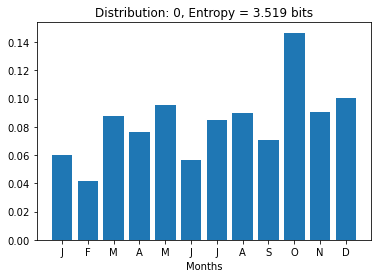

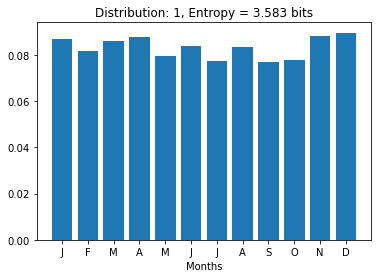

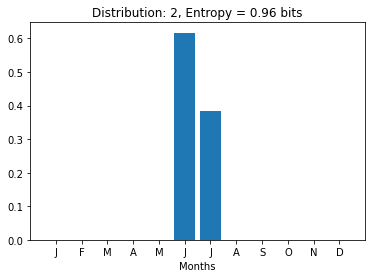

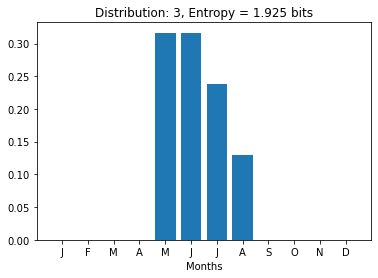

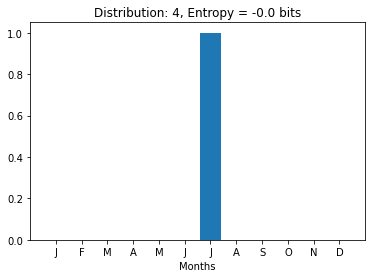

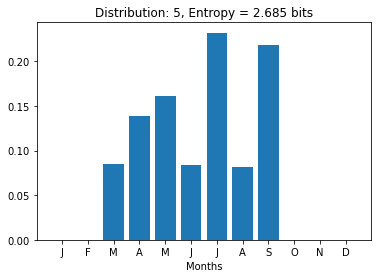

In [60]:
for i, y in enumerate(d):
    plt.bar(range(12), y)
    plt.xlabel("Months")
    plt.title('Distribution: {0}, Entropy = {1} bits'.format(i, Entropy(d[i])))
    plt.gca().set_xticks(month_starts)
    plt.gca().set_xticklabels(months)
    plt.show()

**Question 2.2:**
From what you have learned from your results, which type of probability distributions would you expect to have the highest entropy and which distributions to have the lowest entropy and why? 

According to my results, a distribution with events that have equal probabilities of occuring will have the highest entropy (for example the normal and binomial distribution) as their probability distribution will be highly uncertain. In contrast, a skewed distribution will have the lowest entropy since some events will have higher probabilities than others, and therefore will result in less uncertainty. Furthermore, distributions with fewer events will have smaller entropies as their probability is distributed over a smaller number of events and therefore the uncertainty is decreased. This uncertainty is described by -log2(x) which decreases as the probability of x increases and therefore leads to a lower entropy.

### Measuring the dependence between two random variables

We can use entropies to measure the degree of statistical dependence between two random variables. Consider two random variables X and Y. The conditional entropy H(Y|X) measures the uncertainty in Y given that we know X (the | symbol is read as "given that"). If knowing X tells us nothing about the value of Y, then H(Y|X)=H(Y) — the uncertainty in Y is the same as if we did not know X; if knowing X tells us everything about Y, for example if Y=2X then knowing X allows us to predict Y with certainty, then H(Y|X)=0. Consequently, a measure of the degree of dependence between X and Y is:

\begin{equation*}
H(Y)−H(Y|X)
\end{equation*}

which equals zero if knowing X tells us nothing about Y and equals H(Y) if knowing X means that we know Y.

This quantity is often referred to as the mutual information between X and Y: it measures how much the uncertainty in Y has decreased if we know X. To quantify the degree of dependence, it is useful to have a measure that has a minimum of zero and a maximum of one, and we therefore often use

\begin{equation*}
\frac{H(Y)−H(Y|X)}{H(Y)}
\end{equation*}
as a normalized mutual information.

Four datasets are given as an array of arrays in XandY.npy. Each dataset consists of measurements of an X variable and simultaneous measurements of a Y variable. The first element of the array, d[0] if you use d= load('XandY.npy'), gives the measured values of X and the second element, d[1], gives the corresponding measured values of Y for the first dataset; the third, d[2], and fourth, d[3], elements give the values of X and Y for the second dataset, and so on.

**Question 3.1:**
Write a general function to calculate the correlation coefficient between two arrays X and Y. Remember that the correlation coefficient is defined as

\begin{equation*}
\frac{\sum_{i} (x_{i}-E(x))(y_{i}-E(y))}{(\sum_{i} (x_{i}-E(x))^2 \sum_{i} (y_{i}-E(y))^2)^(1/2)}
\end{equation*}
where E[x] is the mean of X and E[y] is the mean of Y. Here xi is the i’th element of the array X and i runs from 0 to the total number of elements in X. The sum therefore runs over each element in X and the corresponding element in Y.

In [62]:
d= np.load('XandY.npy')

def corr_coef(X, Y):
    E_X = np.mean(X)
    E_Y = np.mean(Y)
    top = np.sum((X - E_X)*(Y - E_Y))
    bottom = np.sqrt((np.sum((X - E_X)**2))*(np.sum((Y - E_Y)**2)))
    CC = top/bottom
    return round(CC, 2)

In [63]:
d.shape

(8, 10000)

**Question 3.2:**
Plot a two dimensional histogram of one of the datasets with a 10x10 grid to bin the data.

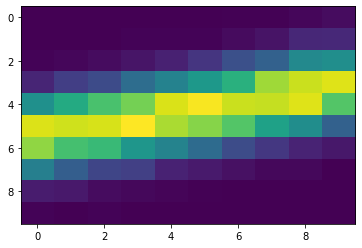

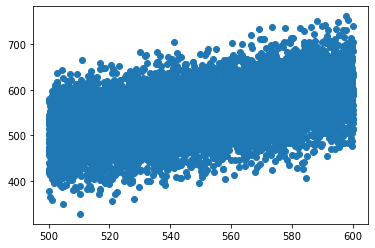

In [65]:
plt.imshow(np.rot90(np.histogram2d(d[0], d[1], bins = 10)[0],k=1), aspect = 'auto')
plt.show()

#comparing to scatter
plt.plot(d[0], d[1], 'o')
plt.show()

**Question 3.3:**
Write a function to calculate the mutual information between two random variables X and Y normalized by the entropy of Y. You will need to calculate H(X), H(Y) and H(Y|X). To do so you will need to estimate P(X,Y), and then find P(X) and P(Y).

The conditional entropy can be shown to be

\begin{equation*}
H(Y|X)=\sum_{x,y} P(X=x, Y=y)log_{2}(\frac{P(X=x)}{P(X=x, Y=y)}
\end{equation*}

where the sum x is over all values of X and the sum y is over all values of Y.

Estimate P(X=xi,Y=yj), which here is the probability that X lies in the i'th bin on the x-axis and Y lies in the j'th bin on the y-axis.

In [83]:
def Mutual_info(x,y):
    H, xe, ye = np.histogram2d(x,y, (10,10))
    nxy=np.rot90(H)
    pxy = nxy / np.sum(nxy)
    py = np.sum(pxy, axis=1)
    px = np.sum(pxy, axis=0)
    hxy=[]
    for value in pxy:
            for j,i in zip(value,px):
                if j==0:
                    continue
                hxy.append(j*np.log2(i/j))
    return(round((Entropy(py)-sum(hxy))/Entropy(py),3))

**Correlation Coefficient** for the first dataset:

In [84]:
corr_coef(d[0], d[1])

0.52

**Normalized mutual information** for the first dataset:

In [85]:
Mutual_info(d[0], d[1])

0.085

**Question 3.4:**
Plot each dataset as a scatterplot and title the figure with both the value of the correlation coefficient and the value of the normalized mutual information. Considering all datasets, explain why both measures of dependence change with each dataset in the way you observe.

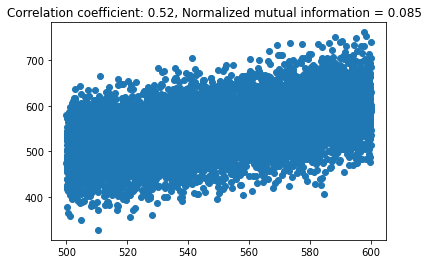

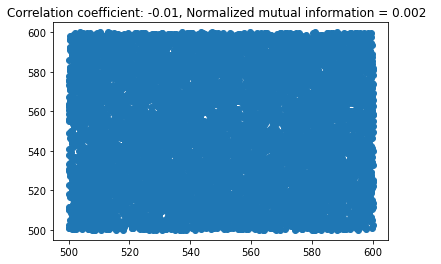

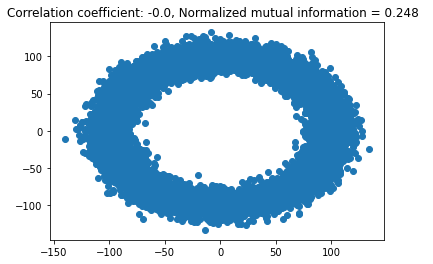

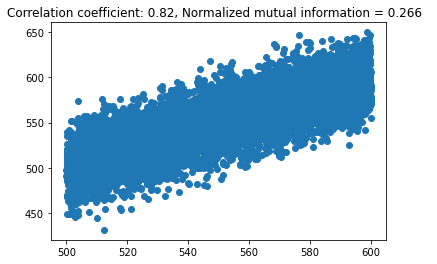

In [86]:
for i in range(0,len(d)):
    if i %2 ==0:
        plt.scatter(d[i],d[i+1])
        plt.title('Correlation coefficient: {0}, Normalized mutual information = {1}  '.format(corr_coef(d[i], d[i+1]), Mutual_info(d[i], d[i+1])))
        plt.show()
    

The correlation coefficient is used to measure the correlation between a dataset X and another dataset Y. A high coefficent (close to 1) indicates high correlation between X and Y, whilst a value closer to 0 indicates very little correlation between two variables. The coefficient increases as the data variability decreases (dataset 1,4 vs dataset 2). The correlation between two data sets also increases as it follows more of a linear trend (dataset 3 vs dataset 4).

As for the normalised mutual information, it quantifies how dependent two random variables (X and Y) are to each other. A high normalised mutual information (close to 1) means the two random variables are dependent, whilst a value close to 0 means they are independent. Due to the even distribution in dataset 2, its mutual information is 0 as the two variables are independent to each other and one variable gives little information about the other. Dataset 3 has a high value for mutual information as the symmetry in the dataset means knowing X gives information about Y (dependent variables). As for the first and last dataset, it shows that a reduction in the variability of the data enables to gain more information about a variable when the other is known.